# Model Replication

Making use of the classes in the "modules.py" (some classes modified from the mesa framework) and "Visu.py" files, results from replication and original model by Janssen and Rollins can be compared. Relational equiv?

In [1]:
from modules import Resource_Model, BatchRunner, Data_Collection
from visualization import Visu
%matplotlib inline

## Exploring the Parameter Space: CPR Levels and Gini of Contributions / Extractions

Figs. 2, 3, and 4 in Janssen's and Rollins' paper show the averages of generated CPR level as well as Gini coefficients of contributions and extractions for different values for parameters alpha and beta. Setting up a model with Janssen's and Rollins' set of default parameter values (see Table 2 in Janssen's and Rollins' paper), the resulting graphs can be compared. First, the case for only asymmetric games is tested. The model is run for 50 iterations.

In [2]:
runs = 10
agents = 5
eta = 0.5
fa = 1
r = 2
iterations = 50
alpha_beta_values = [] #the range of values for alpha and beta with which the iterated model is run
for i in range(-10, 11):
    x = i/10
    alpha_beta_values.append(x)

Setting up mesa's BatchRunner for the iterated model, running the model, and plotting the output using matplotlib.

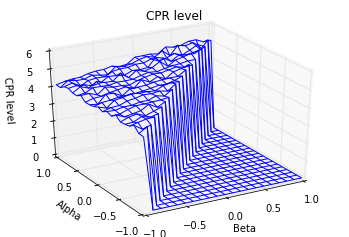

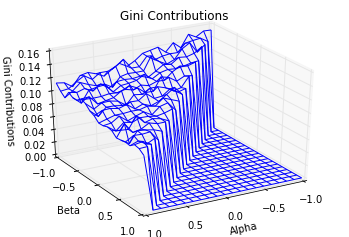

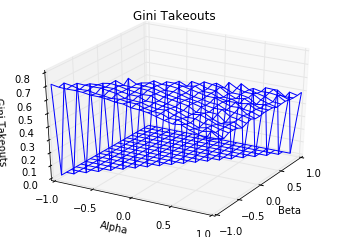

In [3]:
#parameters for the BatchRunner, i.e. the iterated model
param_values = {"N": agents, "alpha": alpha_beta_values, "beta": alpha_beta_values, "eta": eta,
                "fa": fa, "r": r}

model_reporter = {"Generated_CPR": Data_Collection.determine_final_resource,
                  "Gini_Contributions": Data_Collection.compute_gini_contributions, 
                  "Gini_Takeouts": Data_Collection.compute_gini_takeouts}
batch = BatchRunner(Resource_Model, param_values, iterations, runs, model_reporter)

batch.run_all()
out = batch.get_model_vars_dataframe() # Stores the collected data

visualize = Visu(out)
visualize.plot()

The resulting graphs bear little resemblance to the original results. Experimenting with different parameter values, a closer approximation is achieved for eta = 15 (refer to thesis chapters 3.2.1f as well as file xy for a detailed discussion).

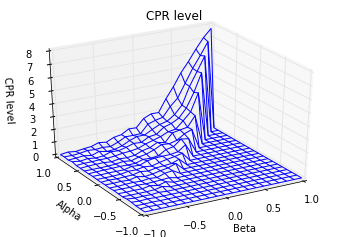

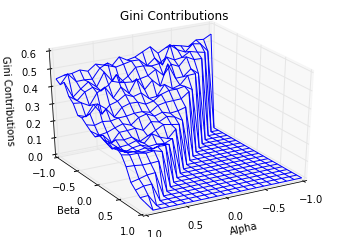

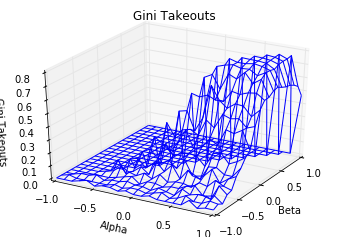

In [ ]:
eta = 15

param_values = {"N": agents, "alpha": alpha_beta_values, "beta": alpha_beta_values, "eta": eta,
                "fa": fa, "r": r}
batch = BatchRunner(Resource_Model, param_values, iterations, runs, model_reporter)

batch.run_all()
out = batch.get_model_vars_dataframe() # Stores the collected data

visualize = Visu(out)
visualize.plot()

## Cultural Selection Model

In [ ]:
import numpy as np
from modules import Imitation_Model

iterations = 3000
groups = 100
m = 0.001 #Probability of facing an agent from another group vs. from the
#agent's own group
epsilon = 0.015 #Probability of intergroup interaction
subiterations = 1
fa_range = 11 #Specifying the range of the frequency of asymmetric games,
#fa
out = []
#print("running...")
for j in range(0, fa_range):
    results = [0, 0, 0, 0]
    for g in range(subiterations):#Collecting Averages of multiple
    #iterations for subiterations > 1
        alpha = 0 # starting value for alpha
        beta = 0 # starting value for beta
        sublist = Imitation_Model.imitation_model(runs, agents, r, alpha, beta, eta, iterations, groups, m, epsilon, j/10)
        #Referring to the imitation_model function defined above
        results = [results[i]+sublist[(iterations - 1)][i] for i in range(len(results))]
    results = (np.array(results))
    results = (results/subiterations)
    out.append(results)
    
cultural_visualization = Visu(out, cultural_selection = 1)
cultural_visualization.cultural_selection_plot()